### Week 1: Studio Activities

#### Activity 1: Set up Python

In [1]:
!python --version

Python 3.10.18


In [2]:
# Install necessary libraries
!pip install numpy pandas matplotlib scikit-learn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.2 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 33.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 33.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 34.3 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 36.8 MB/s  0:00:01m0:00:0100:01
Using cached tzdata-2025.2-py2.py

#### Activity 2: Initialize data exploration and Data Cleaning

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
data = pd.read_csv('water_potability.csv')
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [19]:
# Initialize
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [20]:
# Remove duplicate entries from the data
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

Data shape after removing duplicates: (3276, 10)


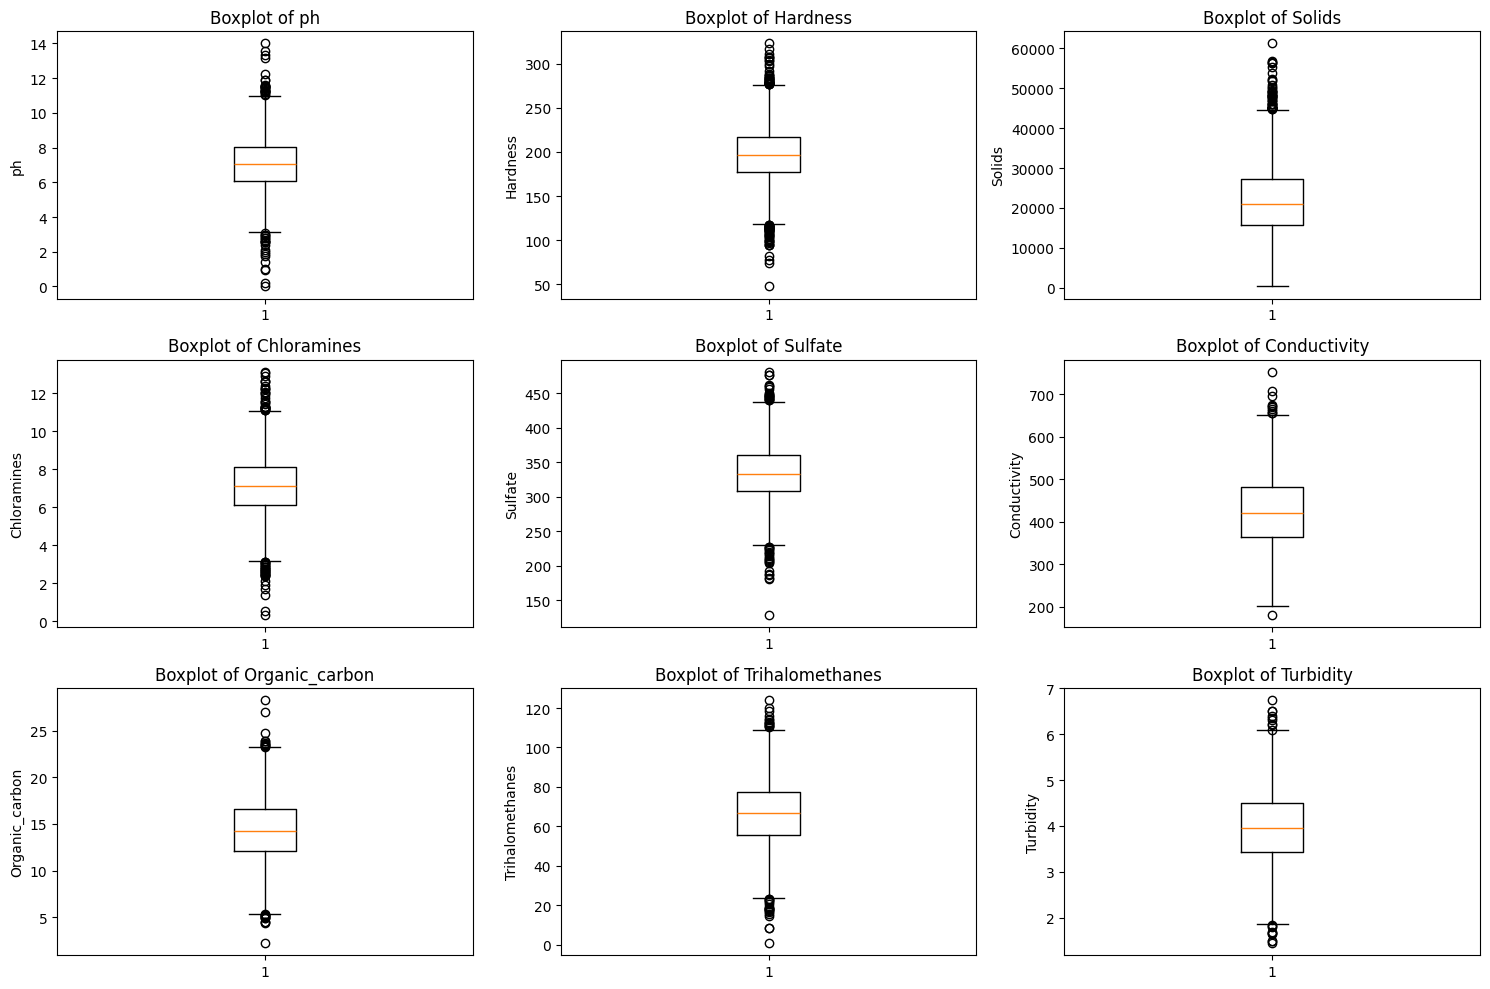

In [21]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
numeric_columns = data.select_dtypes(include=[np.number]).columns[:-1]  # Exclude target variable
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Data shape after removing outliers: (1791, 10)


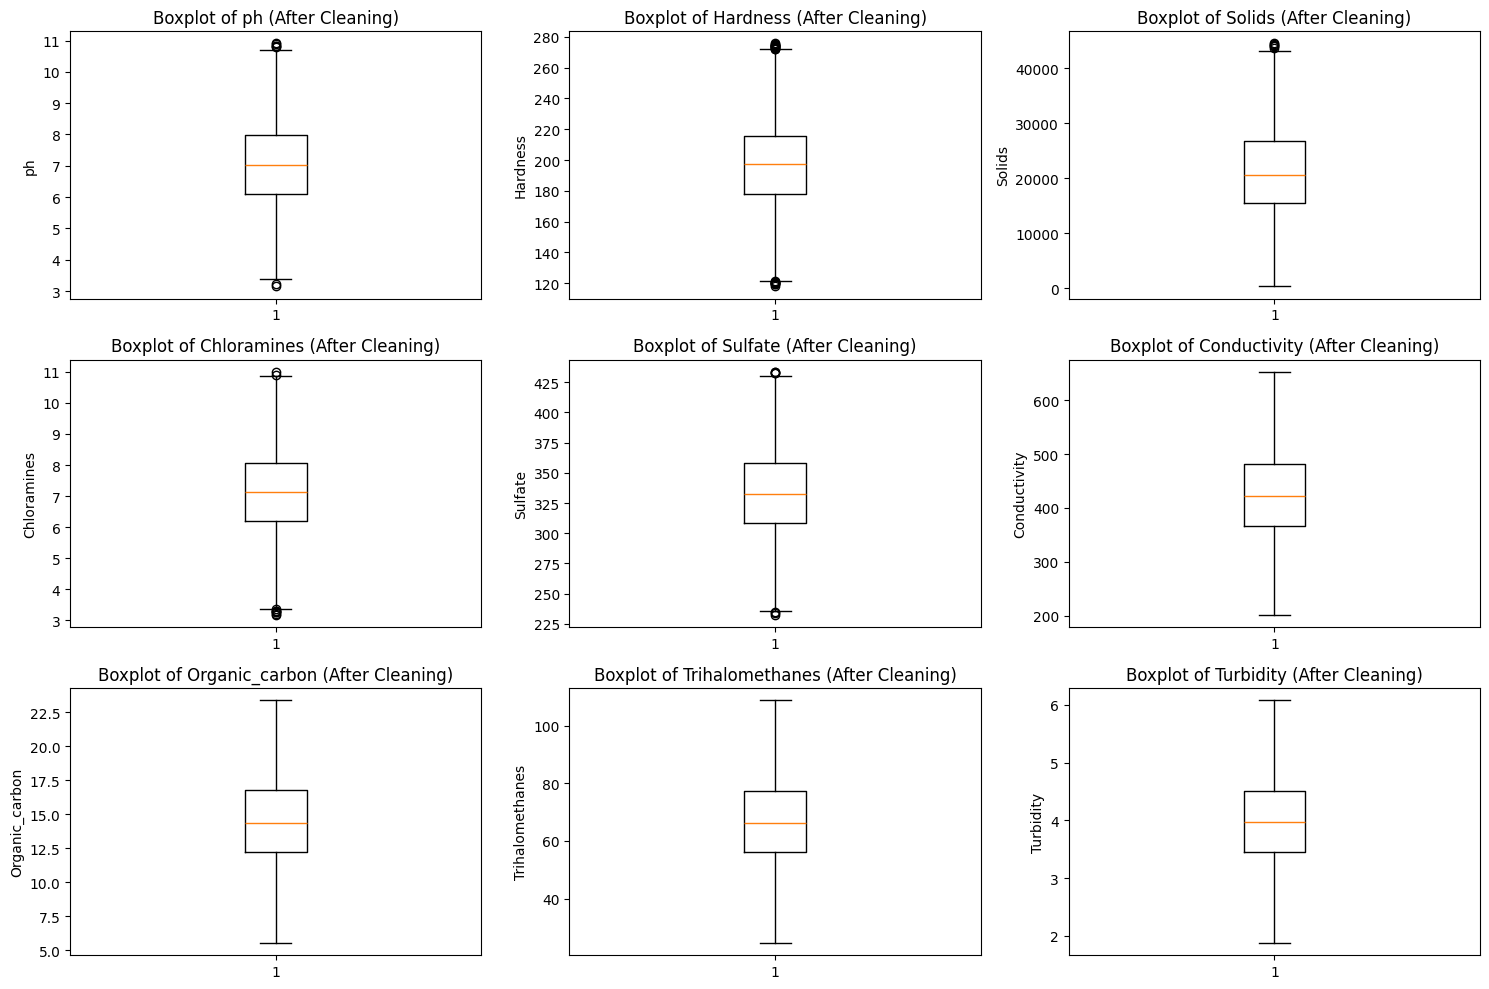

In [22]:
# Remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal
data_clean = remove_outliers(data, numeric_columns)
print(f"Data shape after removing outliers: {data_clean.shape}")

# Check outliers correction after removing them
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(data_clean[col].dropna())
    plt.title(f'Boxplot of {col} (After Cleaning)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [23]:
# Check for missing values
print("Missing values in the cleaned data:")
print(data_clean.isnull().sum())

Missing values in the cleaned data:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


#### Activity 3: EDA

In [24]:
# Identify target variable and predictors
print("Target Variable: Potability")
print("Predictor Variables:", list(numeric_columns))

Target Variable: Potability
Predictor Variables: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


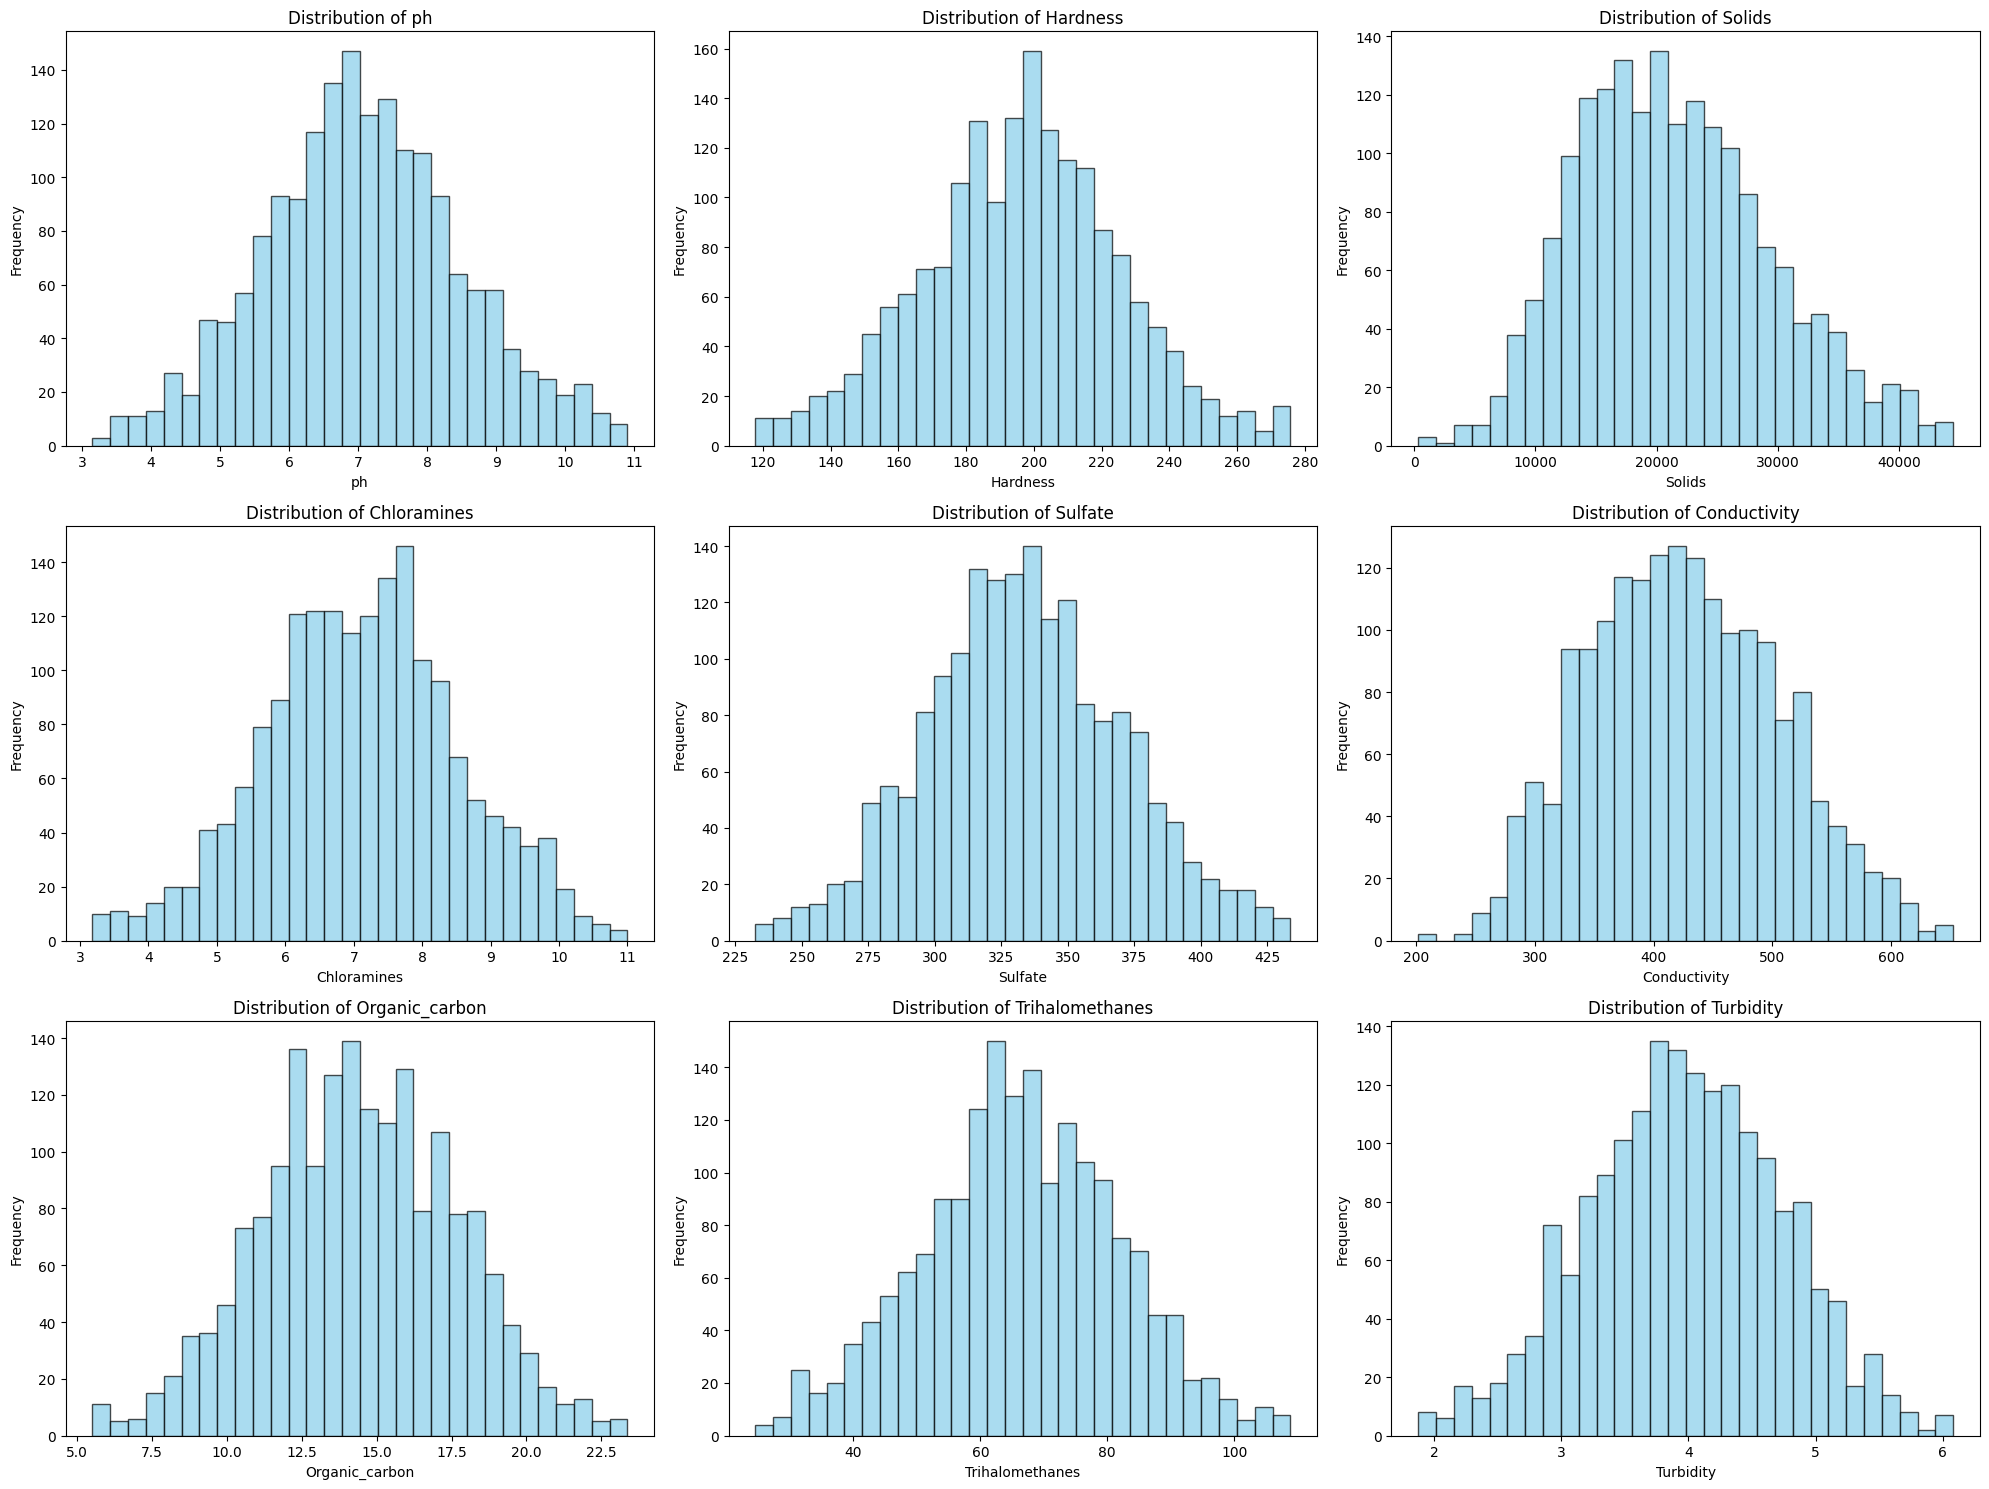

In [25]:
# Univariate Analysis for Predictors
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    plt.hist(data_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for all variables
print(data_clean.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  1791.000000  1791.000000   1791.000000  1791.000000  1791.000000   
mean      7.072984   196.253687  21482.187746     7.122492   333.679981   
std       1.438241    29.404867   7999.807027     1.422362    37.159380   
min       3.148712   117.791230    320.942611     3.181183   232.548814   
25%       6.114756   177.723599  15473.227705     6.185317   308.929791   
50%       7.025822   197.374482  20511.369240     7.135063   332.877574   
75%       7.991063   215.442923  26698.807540     8.065289   358.242592   
max      10.905076   275.746716  44499.728710    10.999995   433.633900   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   1791.000000     1791.000000      1791.000000  1791.000000  1791.000000  
mean     425.583862       14.424836        66.398930     3.972049     0.390843  
std       79.941616        3.227881        15.483895     0.759663     0.488076  


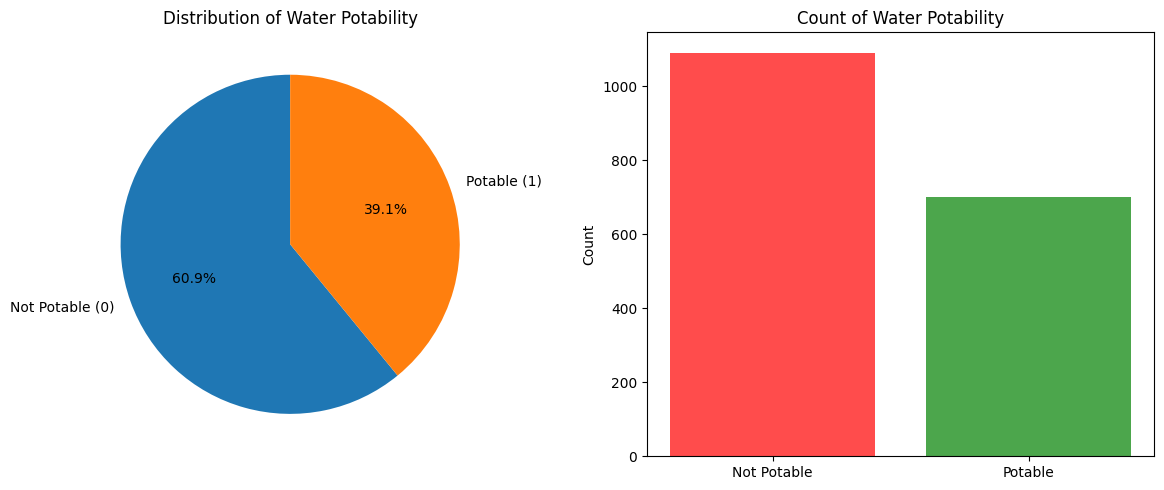

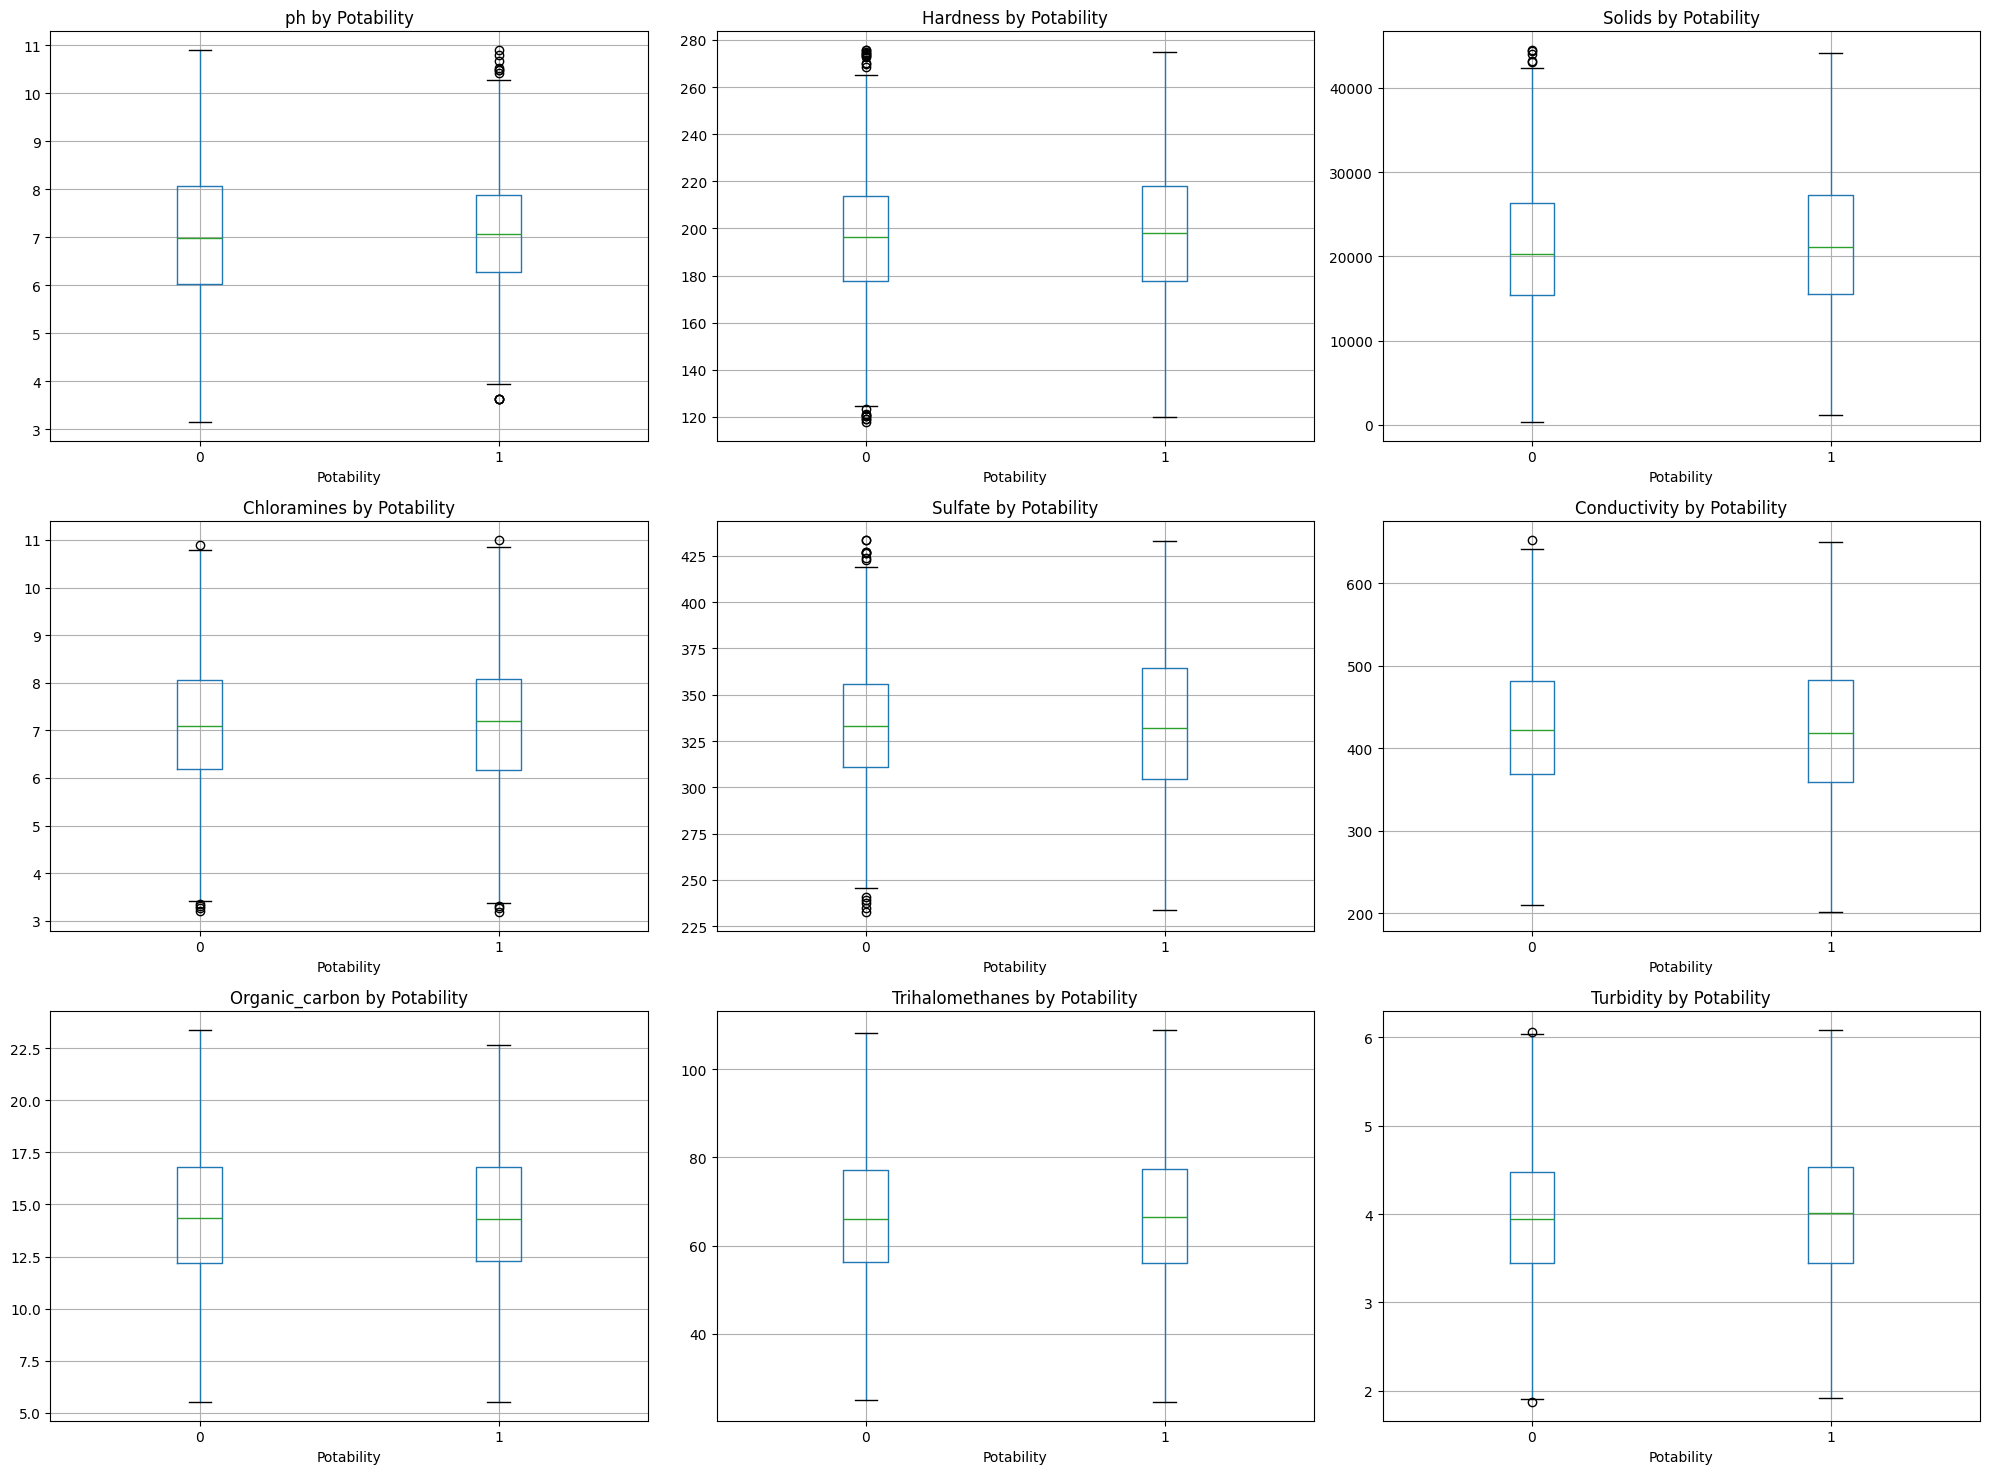

In [28]:
# Target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
potability_counts = data_clean['Potability'].value_counts()
plt.pie(potability_counts.values, labels=['Not Potable (0)', 'Potable (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Water Potability')

plt.subplot(1, 2, 2)
plt.bar(['Not Potable', 'Potable'], potability_counts.values, color=['red', 'green'], alpha=0.7)
plt.title('Count of Water Potability')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Box plots to compare predictor variables by target variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    data_clean.boxplot(column=col, by='Potability', ax=plt.gca())
    plt.title(f'{col} by Potability')
    plt.suptitle('')
plt.tight_layout()
plt.show()

Correlation Matrix:
                    ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
ph               1.000     0.136  -0.085       -0.057    0.004         0.016   
Hardness         0.136     1.000  -0.043       -0.026   -0.091         0.019   
Solids          -0.085    -0.043   1.000       -0.036   -0.140        -0.010   
Chloramines     -0.057    -0.026  -0.036        1.000    0.047        -0.028   
Sulfate          0.004    -0.091  -0.140        0.047    1.000        -0.004   
Conductivity     0.016     0.019  -0.010       -0.028   -0.004         1.000   
Organic_carbon   0.015     0.019   0.005       -0.004    0.019         0.009   
Trihalomethanes  0.020    -0.022  -0.022        0.014   -0.010         0.001   
Turbidity       -0.034    -0.034   0.025       -0.009   -0.006         0.013   
Potability       0.022     0.022   0.038        0.015    0.001        -0.014   

                 Organic_carbon  Trihalomethanes  Turbidity  Potability  
ph                       

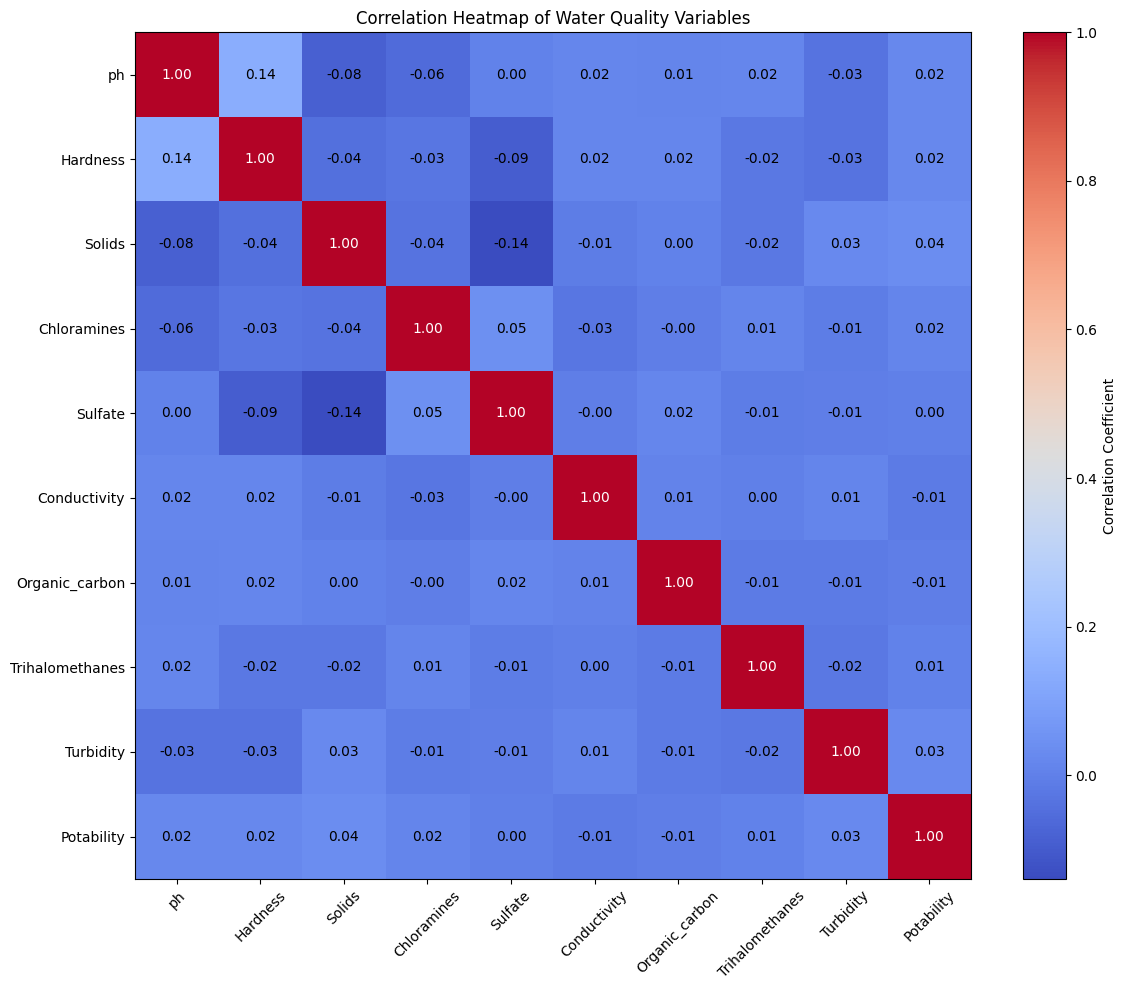

In [29]:
# Calculate correlation matrix
correlation_matrix = data_clean[list(numeric_columns) + ['Potability']].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Heatmap of Water Quality Variables')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add correlation values to the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

plt.tight_layout()
plt.show()